In [25]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
# Load the dataset
df= pd.read_csv("C:\Data science\Assignments\sales_data_with_discounts.csv")
df.head()

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770


In [27]:
# Identify numerical columns
numerical_columns = df.select_dtypes(include=[np.number]).columns

# Calculate mean, median, mode, and standard deviation
mean_values = df[numerical_columns].mean()
median_values = df[numerical_columns].median()
mode_values = df[numerical_columns].mode().iloc[0]
std_values = df[numerical_columns].std()

# Combine all statistics into a DataFrame
descriptive_stats = pd.DataFrame({
    'Mean': mean_values,
    'Median': median_values,
    'Mode': mode_values,
    'Standard Deviation': std_values
})

print(descriptive_stats)


                           Mean       Median          Mode  Standard Deviation
Volume                 5.066667     4.000000      3.000000            4.231602
Avg Price          10453.433333  1450.000000    400.000000        18079.904840
Total Sales Value  33812.835556  5700.000000  24300.000000        50535.074173
Discount Rate (%)     15.155242    16.577766      5.007822            4.220602
Discount Amount     3346.499424   988.933733     69.177942         4509.902963
Net Sales Value    30466.336131  4677.788059    326.974801        46358.656624


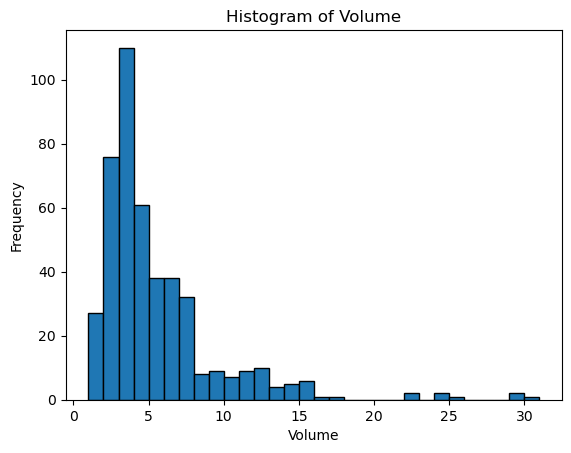

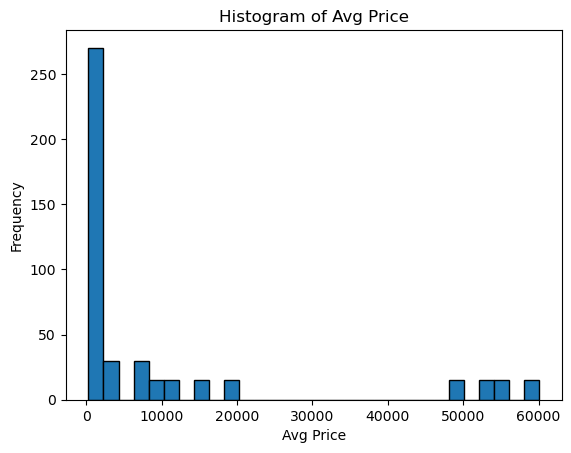

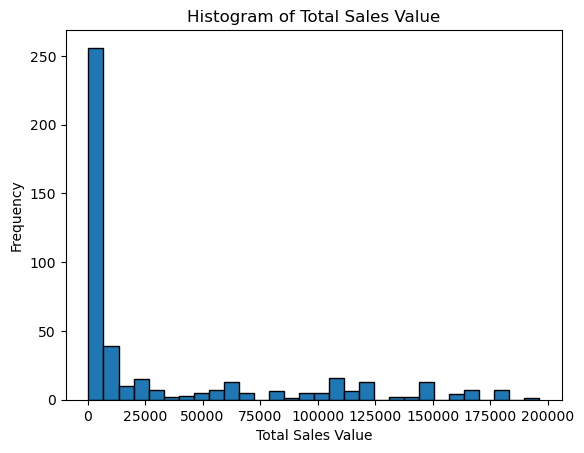

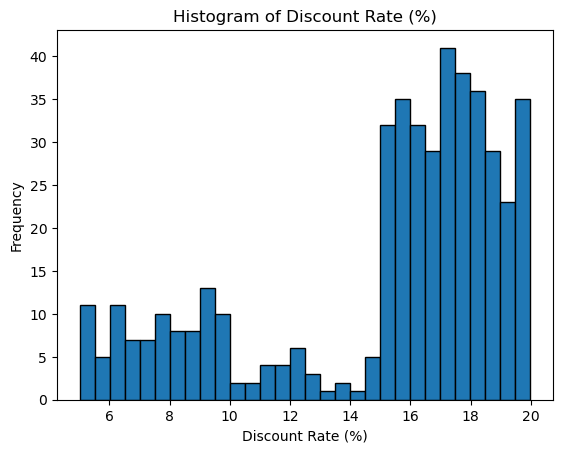

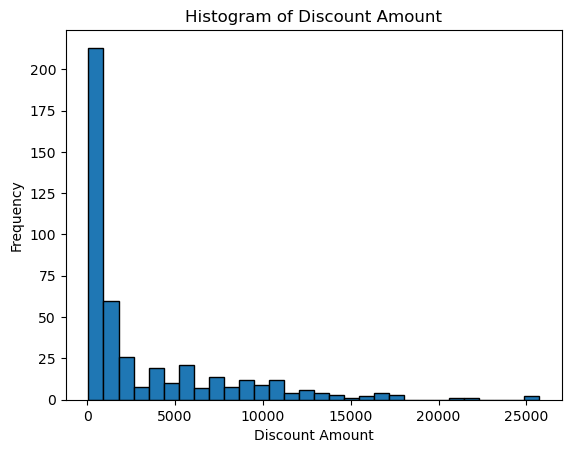

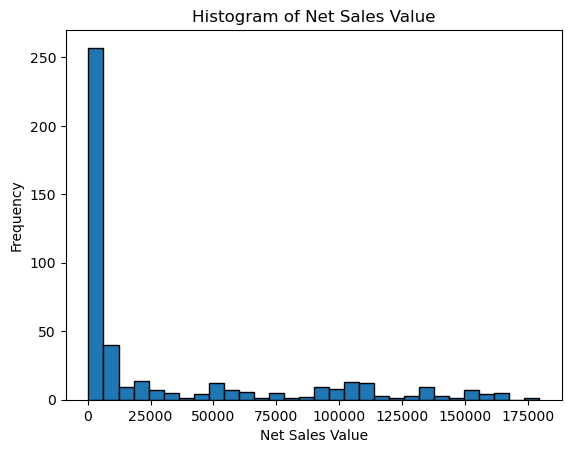

In [28]:
# Plot histograms for numerical columns
selected_columns = numerical_columns[:10] 
for column in selected_columns:
    plt.figure()
    plt.hist(df[column], bins=30, edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


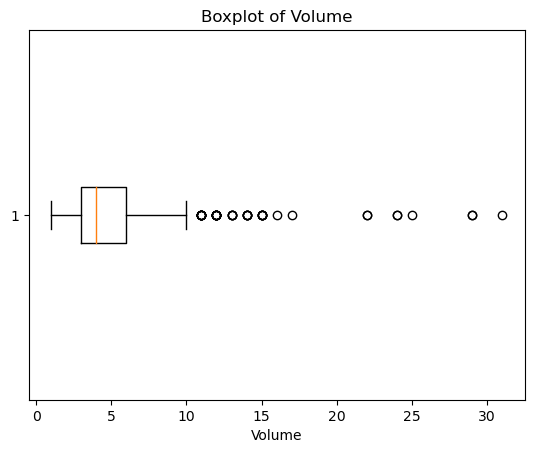

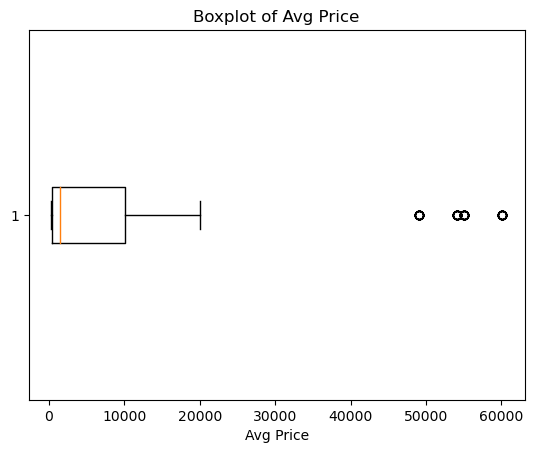

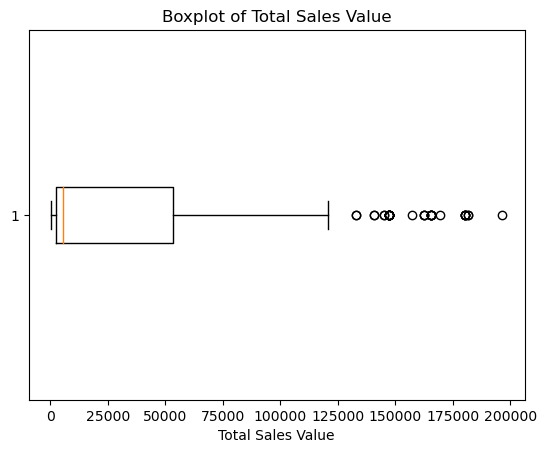

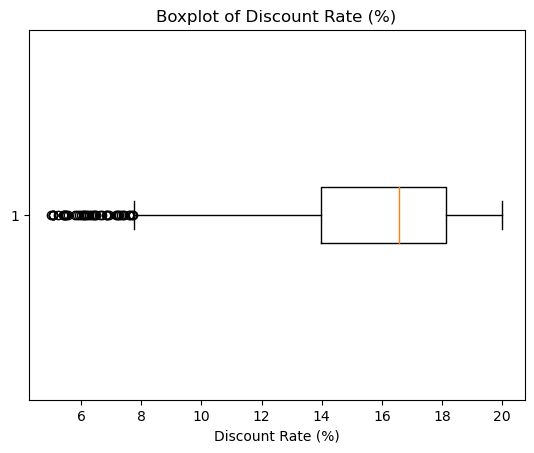

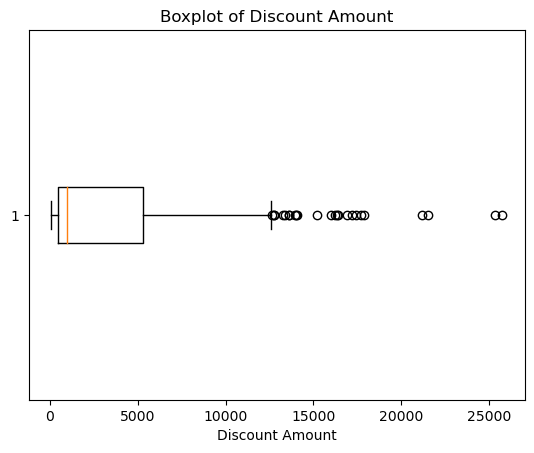

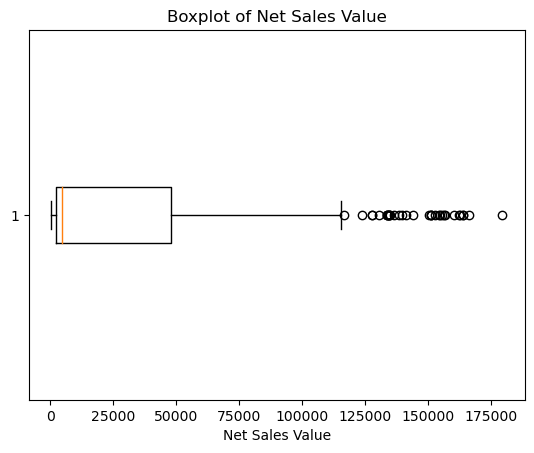

In [29]:
# Plot boxplots for numerical columns
for column in selected_columns:
    plt.figure()
    plt.boxplot(df[column], vert=False)
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.show()


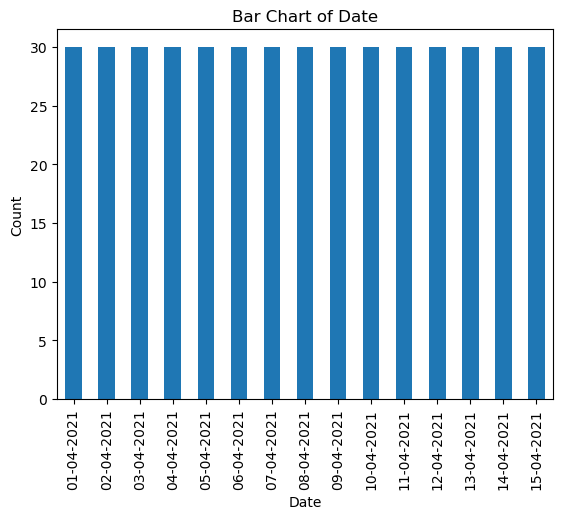

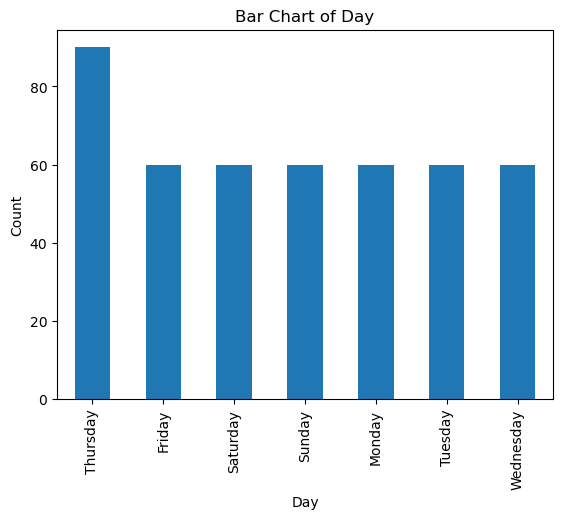

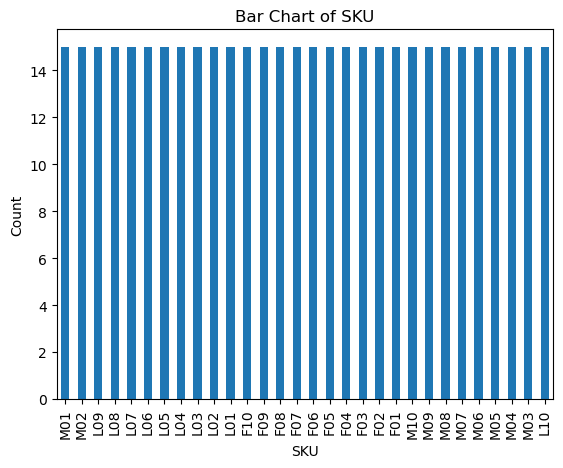

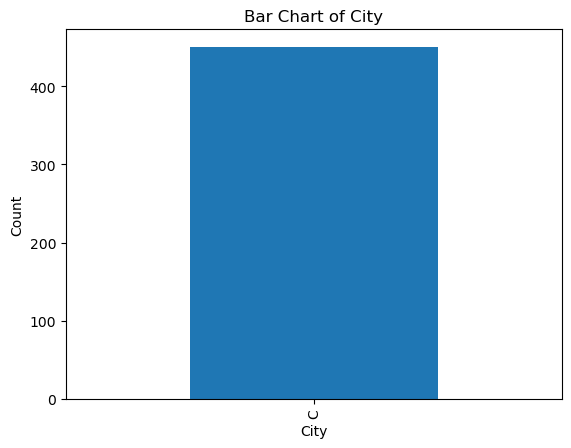

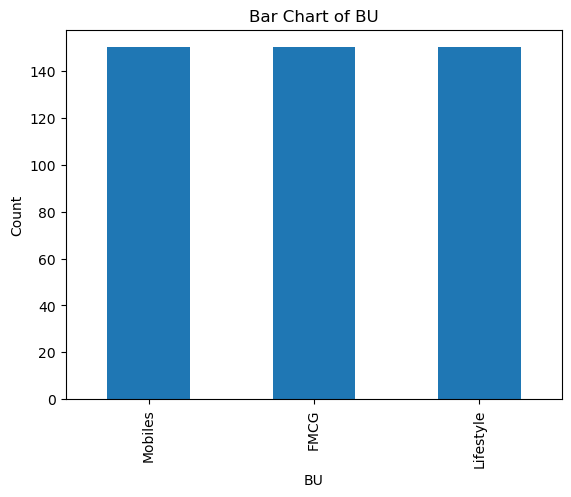

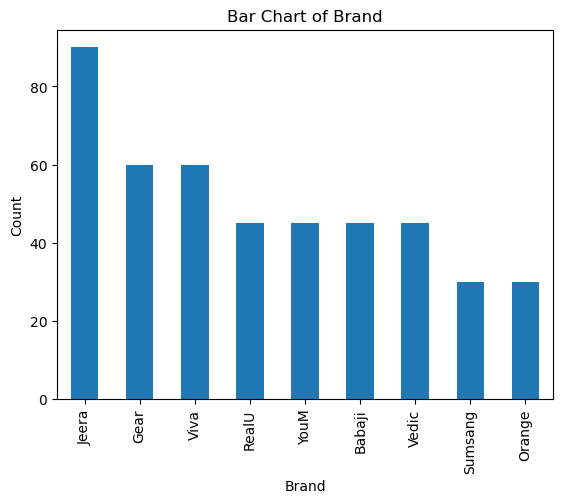

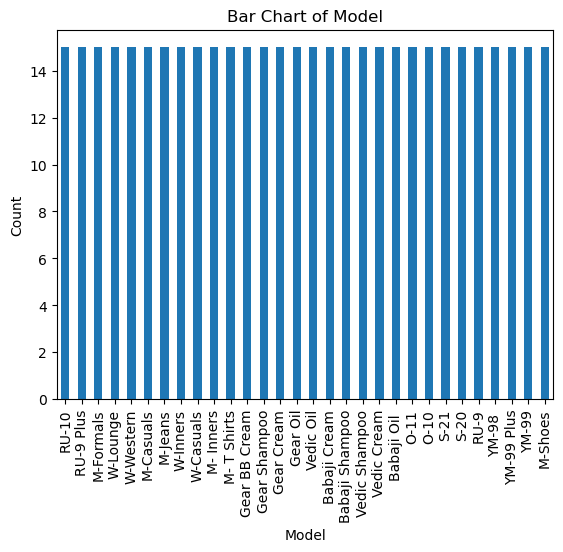

In [30]:
# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Plot bar charts for categorical columns
selected_categorical_columns = categorical_columns[:10]  
for column in selected_categorical_columns:
    plt.figure()
    df[column].value_counts().plot(kind='bar')
    plt.title(f'Bar Chart of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()


In [32]:
# Standardize numerical columns
scaler = StandardScaler()
df_standardized = df.copy()
df_standardized[numerical_columns] = scaler.fit_transform(df[numerical_columns])


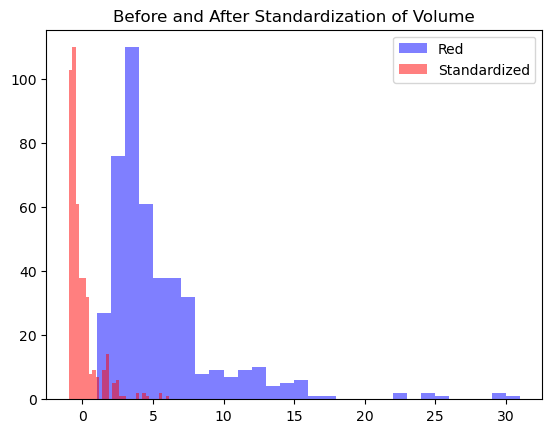

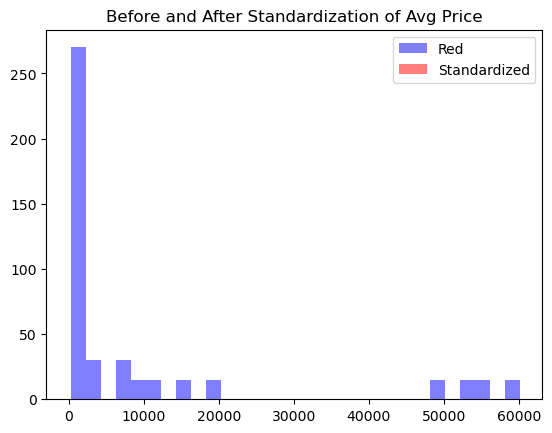

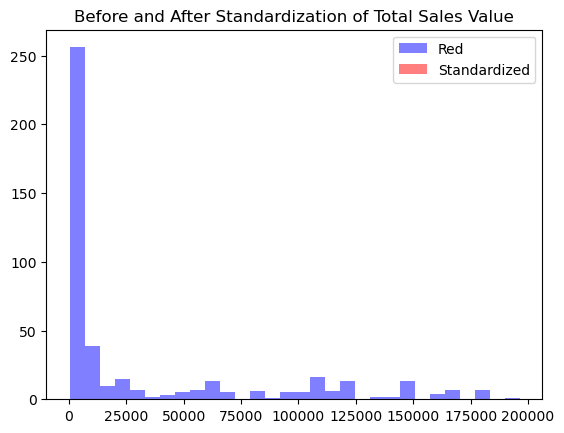

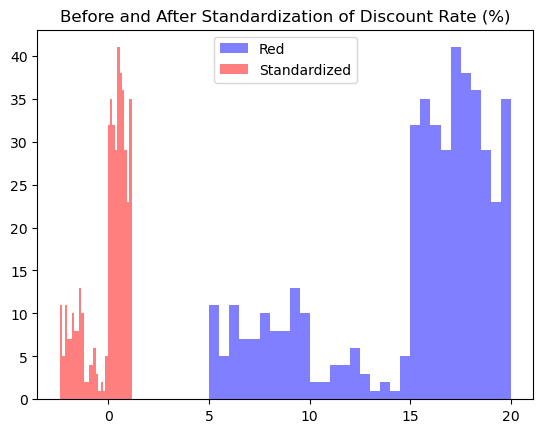

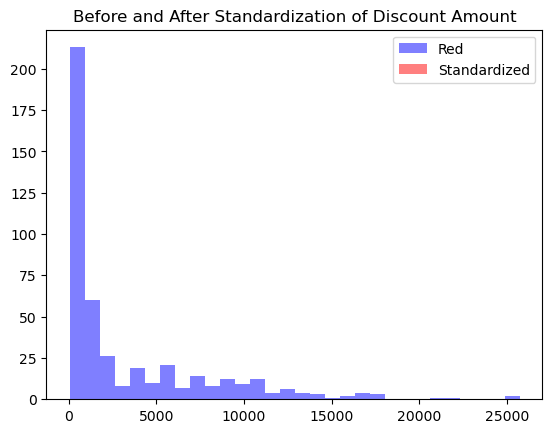

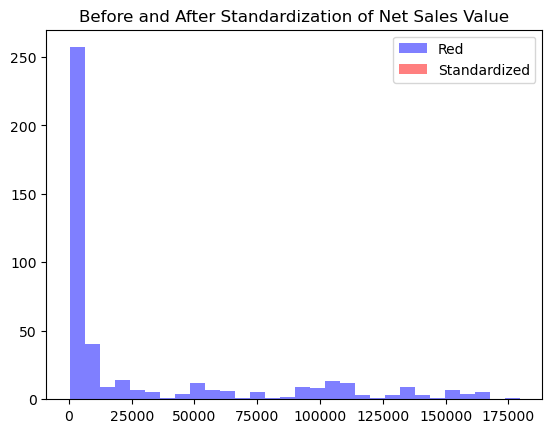

In [34]:
# Before and after comparison of data distributions for selected columns
for column in selected_columns:
    plt.figure()
    plt.hist(df[column], bins=30, alpha=0.5, label='Red', color='blue')
    plt.hist(df_standardized[column], bins=30, alpha=0.5, label='Standardized', color='red')
    plt.title(f'Before and After Standardization of {column}')
    plt.legend()
    plt.show()

In [35]:
# One-hot encoding for categorical columns
df_dummies = pd.get_dummies(df, columns=categorical_columns)

# Display a portion of the transformed dataset
print(df_dummies.head())


   Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0      15      12100             181500          11.654820     21153.498820   
1      10      10100             101000          11.560498     11676.102961   
2       7      16100             112700           9.456886     10657.910157   
3       6      20100             120600           6.935385      8364.074702   
4       3       8100              24300          17.995663      4372.946230   

   Net Sales Value  Date_01-04-2021  Date_02-04-2021  Date_03-04-2021  \
0    160346.501180             True            False            False   
1     89323.897039             True            False            False   
2    102042.089843             True            False            False   
3    112235.925298             True            False            False   
4     19927.053770             True            False            False   

   Date_04-04-2021  ...  Model_Vedic Cream  Model_Vedic Oil  \
0            False  ...

In [ ]:
### Key Findings:
- **Descriptive Analytics:** Statistical measures for numerical columns show variation in average prices, total sales, and discount rates.
- **Data Visualization:** Histograms and boxplots reveal the distribution and presence of outliers in numerical data. Bar charts show the frequency of categorical variables.
- **Standardization:** Standardizing numerical variables ensures uniformity which is crucial for analytical models.
- **One-Hot Encoding:** Converting categorical variables into dummy variables prepares the dataset for machine learning algorithms by making it numerical.

### Importance of Data Preprocessing:
- **Standardization:** Helps in normalizing the data and making it suitable for models that assume normally distributed data.
- **One-Hot Encoding:** Converts categorical variables into a format that can be easily understood by machine learning algorithms.